# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import copy

# Data Import

In [2]:
df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")
pd.set_option('display.max_columns', None)
df_raw.head()

C:\Users\prima\AppData\Local\Temp\ipykernel_32732\736023655.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Columns Description

| Column Name | Description |
|------------|-------------|
| acc_now_delinq | Number of accounts on which the borrower is currently delinquent |
| addr_state | State provided by the borrower in the loan application |
| annual_inc | Self-reported annual income of the borrower |
| application_type | Indicates whether the loan is individual or joint application |
| collection_recovery_fee | Post charge-off collection fee |
| collections_12_mths_ex_med | Number of collections in the last 12 months excluding medical collections |
| delinq_2yrs | Number of 30+ days delinquency incidents in the past 2 years |
| desc | Loan description provided by the borrower |
| dti | Debt-to-income ratio excluding mortgage and requested loan |
| earliest_cr_line | Month when the borrower's earliest credit line was opened |
| emp_length | Employment length in years (0–10, where 10 means 10+ years) |
| emp_title | Job title provided by the borrower |
| funded_amnt | Total amount funded for the loan |
| funded_amnt_inv | Total amount funded by investors |
| grade | Loan grade assigned by Lending Club |
| home_ownership | Home ownership status (RENT, OWN, MORTGAGE, OTHER) |
| id | Unique loan listing ID |
| initial_list_status | Initial listing status of the loan (W, F) |
| inq_last_6mths | Number of credit inquiries in the past 6 months |
| installment | Monthly payment owed by the borrower |
| int_rate | Interest rate on the loan |
| issue_d | Month when the loan was issued |
| last_credit_pull_d | Most recent month credit was pulled |
| last_pymnt_amnt | Last payment amount received |
| last_pymnt_d | Month when the last payment was received |
| loan_amnt | Loan amount applied for by the borrower |
| loan_status | Current status of the loan (target variable) |
| member_id | Unique borrower ID |
| mths_since_last_delinq | Months since last delinquency |
| mths_since_last_major_derog | Months since most recent major derogatory event (90+ days late) |
| mths_since_last_record | Months since last public record |
| next_pymnt_d | Next scheduled payment date |
| open_acc | Number of open credit accounts |
| out_prncp | Remaining outstanding principal |
| out_prncp_inv | Remaining outstanding principal funded by investors |
| policy_code | Policy code (1 = publicly available, 2 = not publicly available) |
| pub_rec | Number of derogatory public records |
| purpose | Purpose of the loan |
| pymnt_plan | Indicates whether a payment plan is in place |
| recoveries | Post charge-off gross recovery |
| revol_bal | Total revolving credit balance |
| revol_util | Revolving credit utilization rate |
| sub_grade | Loan sub-grade assigned by Lending Club |
| term | Loan term in months (36 or 60) |
| title | Loan title provided by the borrower |
| tot_coll_amt | Total collection amounts ever owed |
| tot_cur_bal | Total current balance of all credit accounts |
| total_acc | Total number of credit accounts |
| total_pymnt | Total payments received to date |
| total_pymnt_inv | Total payments received by investors |
| total_rec_int | Total interest received |
| total_rec_late_fee | Total late fees received |
| total_rec_prncp | Total principal received |
| total_rev_hi_lim | Total revolving credit limit |
| url | URL of the loan listing page |
| verification_status | Income verification status |
| zip_code | First three digits of borrower’s ZIP code |


# Initial EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df_raw.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


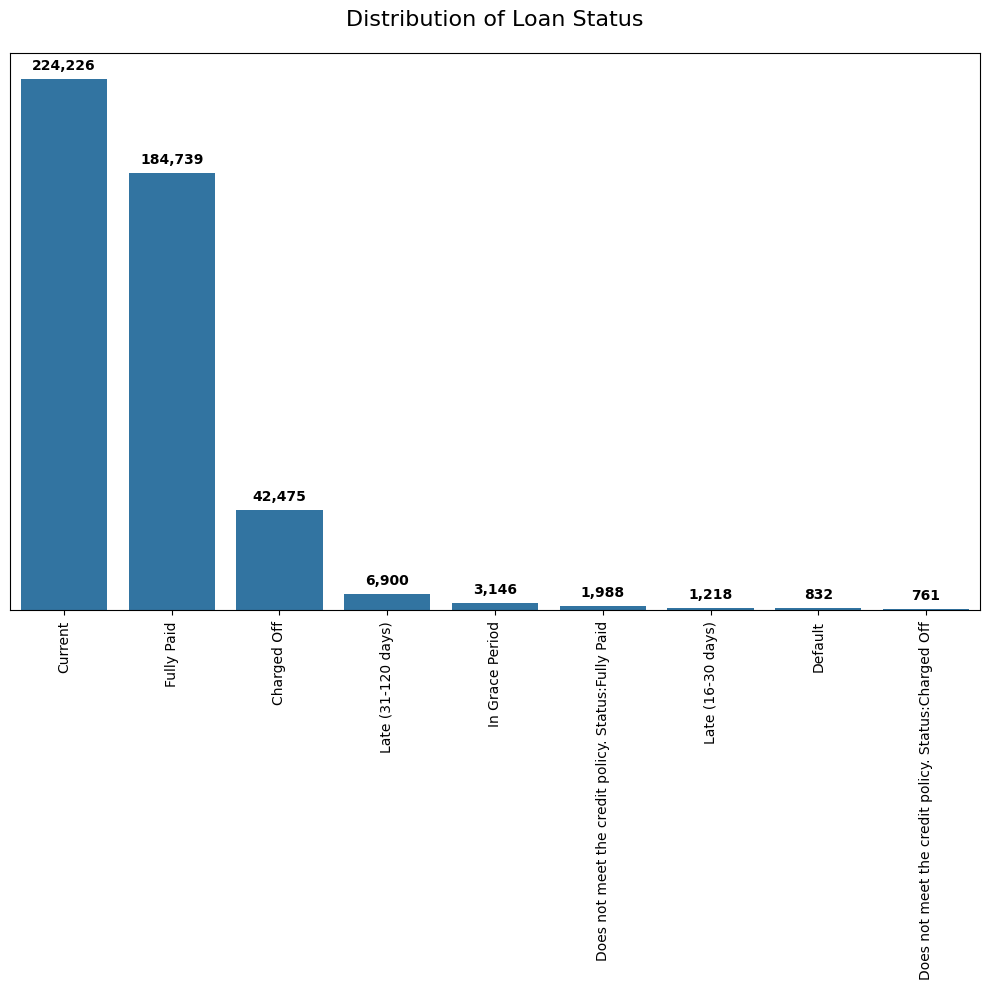

In [5]:
# Membuat plot dengan urutan dari terbesar ke terkecil
order = df_raw['loan_status'].value_counts().index

# Membuat plot
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_raw, x='loan_status', order=order)

# Memutar label sumbu x agar vertikal
plt.xticks(rotation=90)

# Menghapus label sumbu x dan y
ax.set(xlabel='', ylabel='')

# Menyembunyikan sumbu y
ax.yaxis.set_visible(False)

# Menambahkan judul
plt.title('Distribution of Loan Status', fontsize=16, pad=20)

# Menambahkan nilai count di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()
plt.show()

# Data Preparation

## Feature Selection

In [6]:
df_raw.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
drop_cols = [
    # Identifier
    "Unnamed: 0",
    "id",
    "member_id",
    "url",

    # Free text (unstable & noisy)
    "emp_title",
    "desc",
    "title",

    # Post-loan / payment leakage
    "funded_amnt",
    "funded_amnt_inv",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "next_pymnt_d",

    # Credit pulled after approval
    "last_credit_pull_d",

    # Redundant or not predictive
    "policy_code",
    "grade",
    "zip_code",

    # Single value
    "application_type"
]

In [8]:
df_raw.drop(columns = drop_cols, inplace = True)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   sub_grade                    466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

In [10]:
continuous_cols = df_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(df_raw[continuous_cols],0.90)
corr_features

{'funded_amnt', 'funded_amnt_inv', 'installment'}

In [13]:
df_raw.drop(columns=list(corr_features), inplace = True)

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   445277 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   issue_d                      466285 non-null  object 
 9   loan_status                  466285 non-null  object 
 10  pymnt_plan                   466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  addr_state                   466285 non-null  object 
 13 

In [15]:
df_raw.sample(10)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
14754,12375,60 months,18.79,E3,< 1 year,RENT,36000.0,Source Verified,May-11,Current,n,debt_consolidation,NJ,20.03,2.0,Feb-05,2.0,3.0,NaN,6.0,0.0,1075,63.2,17.0,f,0.0,NaN,0.0,NaN,NaN,NaN
224673,3800,36 months,13.11,B4,3 years,RENT,60000.0,Not Verified,Mar-12,Fully Paid,n,credit_card,TX,4.36,0.0,May-92,1.0,NaN,NaN,5.0,0.0,7927,49.9,12.0,f,0.0,NaN,0.0,NaN,NaN,NaN
222938,16000,60 months,19.22,D5,2 years,MORTGAGE,72000.0,Verified,Mar-12,Charged Off,n,debt_consolidation,MO,11.55,1.0,Jul-94,2.0,14.0,NaN,4.0,0.0,1329,47.5,26.0,f,0.0,NaN,0.0,NaN,NaN,NaN
364647,6500,36 months,10.99,B3,10+ years,RENT,45000.0,Not Verified,Jun-14,Current,n,debt_consolidation,WA,15.65,0.0,Apr-97,0.0,NaN,NaN,8.0,0.0,16700,44.4,21.0,w,0.0,NaN,0.0,0.0,38822.0,37600.0
414879,20000,36 months,7.90,A4,10+ years,MORTGAGE,123000.0,Verified,Apr-14,Fully Paid,n,home_improvement,FL,8.66,0.0,May-85,0.0,30.0,NaN,12.0,0.0,18017,27.5,22.0,f,0.0,NaN,0.0,1829.0,167979.0,65400.0
224861,8000,36 months,18.25,D3,10+ years,RENT,87000.0,Not Verified,Mar-12,Fully Paid,n,debt_consolidation,CT,6.72,0.0,Sep-08,2.0,NaN,NaN,8.0,0.0,4483,44.0,8.0,f,0.0,NaN,0.0,NaN,NaN,NaN
431528,25000,36 months,6.62,A2,4 years,MORTGAGE,184000.0,Source Verified,Mar-14,Current,n,credit_card,CO,18.36,0.0,Sep-99,0.0,NaN,NaN,14.0,0.0,37551,75.9,42.0,f,0.0,NaN,0.0,0.0,454710.0,49500.0
191616,6000,36 months,13.11,B4,< 1 year,MORTGAGE,50000.0,Not Verified,Oct-12,Fully Paid,n,credit_card,OH,16.75,0.0,Mar-02,0.0,80.0,NaN,9.0,0.0,4500,81.8,20.0,w,0.0,81.0,0.0,0.0,134135.0,5500.0
6574,10000,36 months,15.96,C5,< 1 year,RENT,39000.0,Not Verified,Sep-11,Charged Off,n,debt_consolidation,TX,18.98,0.0,Dec-03,1.0,NaN,NaN,5.0,0.0,9068,97.5,7.0,f,0.0,NaN,0.0,NaN,NaN,NaN
126873,16000,60 months,12.12,B3,10+ years,MORTGAGE,37710.0,Verified,Jun-13,Current,n,credit_card,NC,21.93,0.0,Apr-99,0.0,77.0,NaN,4.0,0.0,11601,91.3,14.0,f,0.0,78.0,0.0,0.0,196892.0,12700.0


## Fixing Data Type

In [16]:
def parse_earliest_cr_line(val):
    if pd.isna(val):
        return pd.NaT
    
    month_str, year_str = val.split("-")
    year = int(year_str)
    
    # aturan century
    if year >= 30:
        year += 1900
    else:
        year += 2000
    
    return pd.to_datetime(f"{year}-{month_str}-01", format="%Y-%b-%d")


In [17]:
df_raw["earliest_cr_line"] = df_raw["earliest_cr_line"].apply(parse_earliest_cr_line)

In [18]:
df_raw["issue_d"] = df_raw["issue_d"].apply(parse_earliest_cr_line)

In [19]:
(df_raw["earliest_cr_line"] > df_raw["issue_d"]).sum()

np.int64(0)

In [20]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  pymnt_plan                   466285 non-null  object        
 11  purpose                   

In [21]:
for col in df_raw.columns:
    if df_raw[col].dtype == "float64":
        s = df_raw[col]
        is_integer_like = np.all(np.isclose(s.dropna() % 1, 0))
        if is_integer_like:
            df_raw[col] = s.astype("Int64")

In [22]:
int_cols = df_raw.select_dtypes(include='int64').columns
df_raw[int_cols] = df_raw[int_cols].astype('Int64')

In [23]:
df = copy.deepcopy(df_raw)
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,1985-01-01,1,<NA>,<NA>,3,0,13648,83.7,9,f,0,<NA>,0,<NA>,<NA>,<NA>
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,1999-04-01,5,<NA>,<NA>,3,0,1687,9.4,4,f,0,<NA>,0,<NA>,<NA>,<NA>
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,2001-11-01,2,<NA>,<NA>,2,0,2956,98.5,10,f,0,<NA>,0,<NA>,<NA>,<NA>
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,1996-02-01,1,35,<NA>,10,0,5598,21.0,37,f,0,<NA>,0,<NA>,<NA>,<NA>
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0,1996-01-01,0,38,<NA>,15,0,27783,53.9,38,f,0,<NA>,0,<NA>,<NA>,<NA>


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  pymnt_plan                   466285 non-null  object        
 11  purpose                   

## Feature Engineering

In [25]:
df["credit_history_months"] = (
    (df["issue_d"] - df["earliest_cr_line"]).dt.days / 30
)

In [26]:
df.loc[df["issue_d"]<df["earliest_cr_line"], ["issue_d", "earliest_cr_line"]].shape[0]

0

In [ ]:
df.drop(columns = ["earliest_cr_line"], inplace = True) 
# issue_d also needed to drop for ML training, but we don't drop now as we need for EDA

In [28]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,1,<NA>,<NA>,3,0,13648,83.7,9,f,0,<NA>,0,<NA>,<NA>,<NA>,327.666667
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,5,<NA>,<NA>,3,0,1687,9.4,4,f,0,<NA>,0,<NA>,<NA>,<NA>,154.233333
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,2,<NA>,<NA>,2,0,2956,98.5,10,f,0,<NA>,0,<NA>,<NA>,<NA>,122.733333
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,1,35,<NA>,10,0,5598,21.0,37,f,0,<NA>,0,<NA>,<NA>,<NA>,192.733333
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0,0,38,<NA>,15,0,27783,53.9,38,f,0,<NA>,0,<NA>,<NA>,<NA>,193.766667


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  pymnt_plan                   466285 non-null  object        
 11  purpose                   

In [30]:
# Contoh list region
West = ['CA', 'NV', 'UT', 'CO', 'WY', 'MT', 'ID', 'OR', 'WA', 'AK', 'HI']
Southwest = ['AZ', 'NM', 'TX', 'OK']
Midwest = ['ND', 'MN', 'SD', 'NE', 'KS', 'MO', 'IA', 'WI', 'IL', 'IN', 'OH', 'MI']
Southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'TN', 'KY', 'NC', 'SC', 'WV', 'DC', 'VA', 'DE', 'FL']
Northeast = ['PA', 'MD', 'NJ', 'NY', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']

# Fungsi untuk mapping state ke region
def map_state_to_region(state):
    if state in West:
        return 'West'
    elif state in Southwest:
        return 'Southwest'
    elif state in Midwest:
        return 'Midwest'
    elif state in Southeast:
        return 'Southeast'
    elif state in Northeast:
        return 'Northeast'
    else:
        return 'Other'  # jika ada state yang tidak masuk list

# Terapkan mapping ke kolom addr_state
df['region'] = df['addr_state'].apply(map_state_to_region)

In [31]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df["years"] = df["issue_d"].dt.year

In [33]:
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
continuous_cols = df.select_dtypes(include=["Int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Length of categorical columns: ", len(categorical_cols))
print("Continuous columns:", continuous_cols)
print("Length of continuous columns: ", len(continuous_cols))

Categorical columns: ['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'region']
Length of categorical columns:  11
Continuous columns: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_history_months']
Length of continuous columns:  20


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  pymnt_plan                   466285 non-null  object        
 11  purpose                   

In [35]:
df.isnull().mean().sort_values(ascending=False)

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
mths_since_last_delinq         0.536906
tot_cur_bal                    0.150715
tot_coll_amt                   0.150715
total_rev_hi_lim               0.150715
emp_length                     0.045054
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
total_acc                      0.000062
open_acc                       0.000062
delinq_2yrs                    0.000062
inq_last_6mths                 0.000062
credit_history_months          0.000062
pub_rec                        0.000062
acc_now_delinq                 0.000062
annual_inc                     0.000009
loan_amnt                      0.000000
dti                            0.000000
purpose                        0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
home_ownership                 0.000000
verification_status            0.000000
issue_d                        0.000000


## Handling Missing Values

In [36]:
cols = [
    "mths_since_last_record",
    "mths_since_last_major_derog",
    "mths_since_last_delinq"
]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(0)

In [37]:
cols = ["total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(df[col].median())

In [38]:
# 1. Copy kolom
df["emp_length_num"] = df["emp_length"]

# 2. Cleaning text → numerik
df["emp_length_num"] = (
    df["emp_length_num"]
    .str.replace("10+ years", "10", regex=False)
    .str.replace("< 1 year", "0", regex=False)
    .str.replace(" years", "", regex=False)
    .str.replace(" year", "", regex=False)
    .astype(float)
)

# 3. Missing indicator
df["emp_length_missing"] = df["emp_length_num"].isna().astype("Int64")

# 4. Imputasi median
df["emp_length_num"] = df["emp_length_num"].fillna(
    df["emp_length_num"].median()
)

# 5. Drop kolom lama
df = df.drop(columns=["emp_length"])

In [39]:
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["annual_inc"] = df["annual_inc"].fillna(df["annual_inc"].median())

In [40]:
cols = [
    "collections_12_mths_ex_med", "delinq_2yrs", "open_acc",
    "pub_rec", "total_acc", "inq_last_6mths",
    "acc_now_delinq", "credit_history_months"
]

df[cols] = df[cols].fillna(0)

## Data Encoding

In [41]:
df_raw["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [42]:
loan_status_mapping = {
    # GOOD
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,

    # BAD
    "Charged Off": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
}

In [43]:
df["status_bad"] = df["loan_status"].map(loan_status_mapping)
df = df.dropna(subset=["status_bad"])
df["status_bad"] = df["status_bad"].astype("Int64")
df = df.drop(columns=["loan_status"])
df["status_bad"].value_counts(normalize=True)

status_bad
0    0.80906
1    0.19094
Name: proportion, dtype: Float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   pymnt_plan                           230795 non-null  object        
 9   purpose                              230795 non-null  object        
 10  a

## Outlier Detection

In [45]:
def check_outlier_iqr(series, factor=1.5):
    """
    Check apakah suatu kolom memiliki outlier berdasarkan metode IQR.

    Parameters
    ----------
    series : pd.Series
        Kolom numerik
    factor : float
        Faktor IQR (default = 1.5)

    Returns
    -------
    dict
        {
            'has_outlier': bool,
            'n_outliers': int,
            'lower_bound': float,
            'upper_bound': float
        }
    """
    s = series.dropna()

    # Jika kolom kosong atau hanya 1 nilai unik
    if s.empty or s.nunique() <= 1:
        return {
            "has_outlier": False,
            "n_outliers": 0,
            "lower_bound": np.nan,
            "upper_bound": np.nan
        }

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    n_outliers = ((s < lower_bound) | (s > upper_bound)).sum()

    return {
        "has_outlier": n_outliers > 0,
        "n_outliers": int(n_outliers),
        "lower_bound": float(lower_bound),
        "upper_bound": float(upper_bound)
    }

In [46]:
numeric_cols = df.select_dtypes(include=["Int64", "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'credit_history_months', 'mths_since_last_record_missing',
       'mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing',
       'total_rev_hi_lim_missing', 'tot_cur_bal_missing',
       'tot_coll_amt_missing', 'emp_length_num', 'emp_length_missing',
       'status_bad'],
      dtype='object')

In [47]:
outlier_report = {}

for col in numeric_cols:
    outlier_report[col] = check_outlier_iqr(df[col])

In [48]:
outlier_df = (
    pd.DataFrame(outlier_report)
    .T
    .sort_values("has_outlier", ascending=False)
)

outlier_df


,has_outlier,n_outliers,lower_bound,upper_bound
loan_amnt,True,6944,-9000.0,34200.0
total_acc,True,3263,-8.0,56.0
emp_length_missing,True,8755,0.0,0.0
mths_since_last_major_derog_missing,True,40232,1.0,1.0
mths_since_last_record_missing,True,27646,1.0,1.0
credit_history_months,True,7730,-22.183333,375.283333
total_rev_hi_lim,True,23029,-2700.0,48500.0
tot_cur_bal,True,16261,-132876.5,329151.5
tot_coll_amt,True,18167,0.0,0.0
acc_now_delinq,True,599,0.0,0.0


In [49]:
cols_with_outliers = outlier_df[outlier_df["has_outlier"]].index.tolist()
cols_with_outliers

['loan_amnt',
 'total_acc',
 'emp_length_missing',
 'mths_since_last_major_derog_missing',
 'mths_since_last_record_missing',
 'credit_history_months',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'acc_now_delinq',
 'int_rate',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'revol_util',
 'revol_bal',
 'pub_rec',
 'open_acc',
 'mths_since_last_record',
 'mths_since_last_delinq',
 'inq_last_6mths',
 'delinq_2yrs',
 'dti',
 'annual_inc',
 'status_bad']

In [50]:
cols_without_outliers = outlier_df[~outlier_df["has_outlier"]].index.tolist()
cols_without_outliers

['mths_since_last_delinq_missing',
 'total_rev_hi_lim_missing',
 'tot_cur_bal_missing',
 'tot_coll_amt_missing',
 'emp_length_num']

## Outlier Handling

In [51]:
time_since_cols = [
    "mths_since_last_delinq",
    "mths_since_last_record",
    "mths_since_last_major_derog"
]

In [52]:
CAP_MONTHS = 36

In [53]:
for col in time_since_cols:
    df[col] = df[col].where(
        (df[col] == 0) | (df[col] <= CAP_MONTHS),
        CAP_MONTHS
    )

In [54]:
for col in time_since_cols:
    df[f"{col}_outlier"] = (df[col] == CAP_MONTHS).astype("Int64")

In [55]:
def handle_outlier_column(
    df: pd.DataFrame,
    col: str,
    lower_q: float = 0.01,
    upper_q: float = 0.99
):
    """
    Automatic outlier handling + indicator creation
    """

    s = df[col]
    non_null = s.dropna()

    # ===== karakteristik dasar =====
    is_integer_like = np.all(np.isclose(non_null, non_null.astype(int)))
    is_non_negative = (non_null >= 0).all()
    skewness = skew(non_null)
    zero_ratio = (non_null == 0).mean()

    # ===== hitung quantile =====
    lower = non_null.quantile(lower_q)
    upper = non_null.quantile(upper_q)

    # ===== outlier indicator =====
    df[f"{col}_outlier"] = (
        (s < lower) | (s > upper)
    ).astype("Int64")

    # ===== RULE ENGINE =====

    # 1️⃣ COUNT FEATURES (delinq, inq, acc, pub_rec)
    if is_integer_like and is_non_negative and non_null.max() < 100:
        df[col] = s.clip(lower=0, upper=upper)
        method = "cap_count"

    # 2️⃣ RATIO / PERCENTAGE
    elif col.endswith(("util", "rate", "ratio")) or non_null.max() <= 150:
        df[col] = s.clip(lower=0, upper=100)
        method = "cap_ratio"

    # 3️⃣ HEAVILY RIGHT-SKEWED FINANCIAL
    elif skewness > 2:
        df[col] = np.log1p(s.clip(lower=0))
        method = "log_transform"

    # 4️⃣ GENERAL CONTINUOUS → ROBUST CAP
    else:
        df[col] = s.clip(lower=lower, upper=upper)
        method = "robust_cap"

    return {
        "column": col,
        "skewness": round(skewness, 2),
        "zero_ratio": round(zero_ratio, 3),
        "method_applied": method,
        "lower_bound": round(lower, 2),
        "upper_bound": round(upper, 2)
    }

In [56]:
outlier_columns = [
    "loan_amnt",
    "annual_inc",
    "revol_bal",
    "tot_cur_bal",
    "total_rev_hi_lim",
    "tot_coll_amt",
    "int_rate",
    "dti",
    "revol_util"
]

In [57]:
summary = []

for col in outlier_columns:
    result = handle_outlier_column(df, col)
    summary.append(result)

outlier_summary = pd.DataFrame(summary)

In [58]:
outlier_summary

,column,skewness,zero_ratio,method_applied,lower_bound,upper_bound
0,loan_amnt,0.85,0.000,robust_cap,1500.00,35000.00
1,annual_inc,31.42,0.000,log_transform,18000.00,235000.00
2,revol_bal,15.24,0.008,log_transform,54.94,80631.22
3,tot_cur_bal,4.23,0.000,log_transform,4018.94,585250.60
4,total_rev_hi_lim,10.69,0.000,log_transform,3500.00,116853.00
5,tot_coll_amt,476.67,0.921,log_transform,0.00,1839.06
6,int_rate,0.33,0.000,cap_ratio,6.03,24.70
7,dti,0.18,0.001,cap_ratio,1.18,33.81
8,revol_util,-0.09,0.008,cap_ratio,0.50,97.70


In [59]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months,region,years,mths_since_last_record_missing,mths_since_last_major_derog_missing,mths_since_last_delinq_missing,total_rev_hi_lim_missing,tot_cur_bal_missing,tot_coll_amt_missing,emp_length_num,emp_length_missing,status_bad,mths_since_last_delinq_outlier,mths_since_last_record_outlier,mths_since_last_major_derog_outlier,loan_amnt_outlier,annual_inc_outlier,revol_bal_outlier,tot_cur_bal_outlier,total_rev_hi_lim_outlier,tot_coll_amt_outlier,int_rate_outlier,dti_outlier,revol_util_outlier
0,5000,36 months,10.65,B2,RENT,10.085851,Verified,2011-12-01,n,credit_card,AZ,27.65,0,1,0,0,3,0,9.521422,83.7,9,f,0,0,0,0.0,11.308849,10.03456,327.666667,Southwest,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,60 months,15.27,C4,RENT,10.308986,Source Verified,2011-12-01,n,car,GA,1.00,0,5,0,0,3,0,7.4313,9.4,4,f,0,0,0,0.0,11.308849,10.03456,154.233333,Southeast,2011,1,1,1,1,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,36 months,15.96,C5,RENT,9.413526,Not Verified,2011-12-01,n,small_business,IL,8.72,0,2,0,0,2,0,7.991931,98.5,10,f,0,0,0,0.0,11.308849,10.03456,122.733333,Midwest,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,10000,36 months,13.49,C1,RENT,10.803669,Source Verified,2011-12-01,n,other,CA,20.00,0,1,35,0,10,0,8.630343,21.0,37,f,0,0,0,0.0,11.308849,10.03456,192.733333,West,2011,1,1,0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000,36 months,7.90,A4,RENT,10.491302,Source Verified,2011-12-01,n,wedding,AZ,11.20,0,3,0,0,9,0,8.982687,28.3,12,f,0,0,0,0.0,11.308849,10.03456,86.200000,Southwest,2011,1,1,1,1,1,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   pymnt_plan                           230795 non-null  object        
 9   purpose                              230795 non-null  object        
 10  a

## Post-cleaning EDA

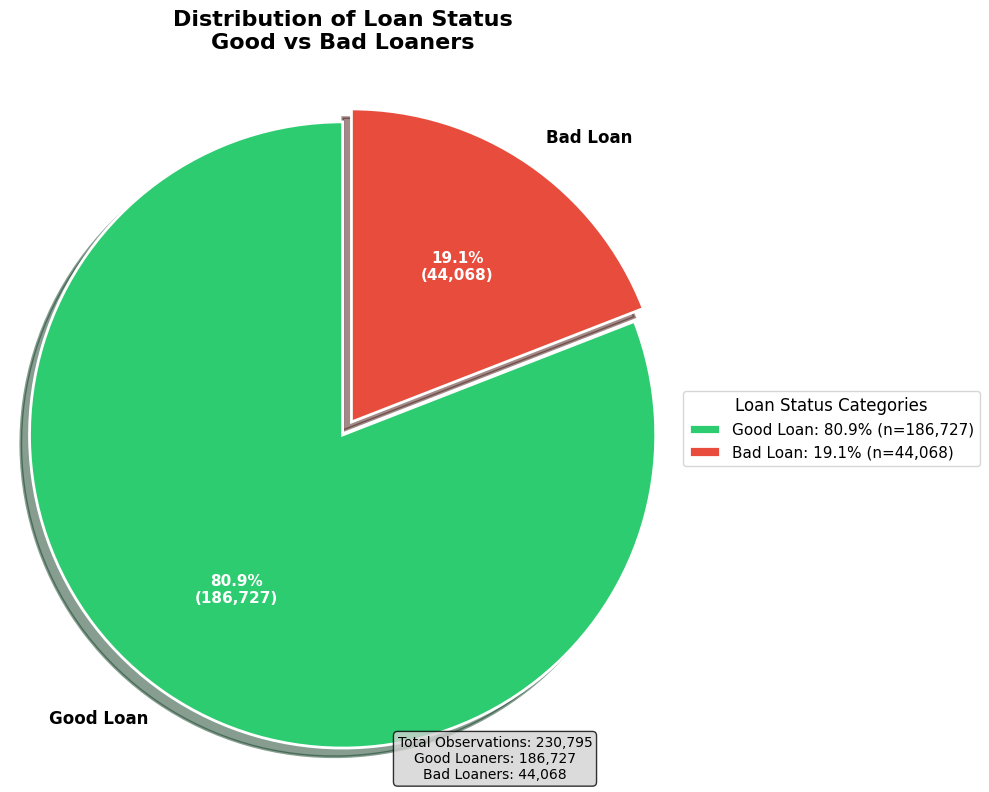

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung proporsi
status_counts = df["status_bad"].value_counts(normalize=True)

# Buat mapping untuk label yang lebih informatif
labels_map = {
    0: "Good Loan",
    1: "Bad Loan"
}

# Warna yang menarik dan sesuai konteks (hijau untuk good, merah untuk bad)
colors = ['#2ECC71', '#E74C3C']  # Hijau untuk good loaner, Merah untuk bad loaner
explode = (0.05, 0)  # Sedikit menonjolkan bagian pertama

# Buat figure dengan ukuran yang sesuai
fig, ax = plt.subplots(figsize=(10, 8))

# Data untuk pie chart
labels = [labels_map[idx] for idx in status_counts.index]
sizes = status_counts.values
percentages = [f'{p:.1%}' for p in sizes]

# Buat pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Perbaiki autopct untuk lebih informatif
for i, (pct_label, autotext) in enumerate(zip(percentages, autotexts)):
    count = df["status_bad"].value_counts().iloc[i]  # Ambil count sebenarnya
    autotext.set_text(f'{pct_label}\n({count:,})')
    autotext.set_fontsize(11)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Buat legend yang informatif
legend_labels = [f'{label}: {pct} (n={count:,})' 
                 for label, pct, count in zip(labels, percentages, df["status_bad"].value_counts())]

ax.legend(wedges, legend_labels,
          title="Loan Status Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=11,
          title_fontsize=12)

# Tambahkan judul
plt.title('Distribution of Loan Status\nGood vs Bad Loaners', 
          fontsize=16, fontweight='bold', pad=20)

# Pastikan pie chart berbentuk lingkaran
ax.axis('equal')

# Tambahkan ringkasan statistik sebagai teks
summary_text = f'Total Observations: {len(df):,}\n'
summary_text += f'Good Loaners: {df["status_bad"].value_counts().get(0, 0):,}\n'
summary_text += f'Bad Loaners: {df["status_bad"].value_counts().get(1, 0):,}'

plt.figtext(0.5, 0.02, summary_text, 
            ha='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\prima\AppData\Local\Temp\ipykernel_32732\3350313162.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=loan_amount_by_status,


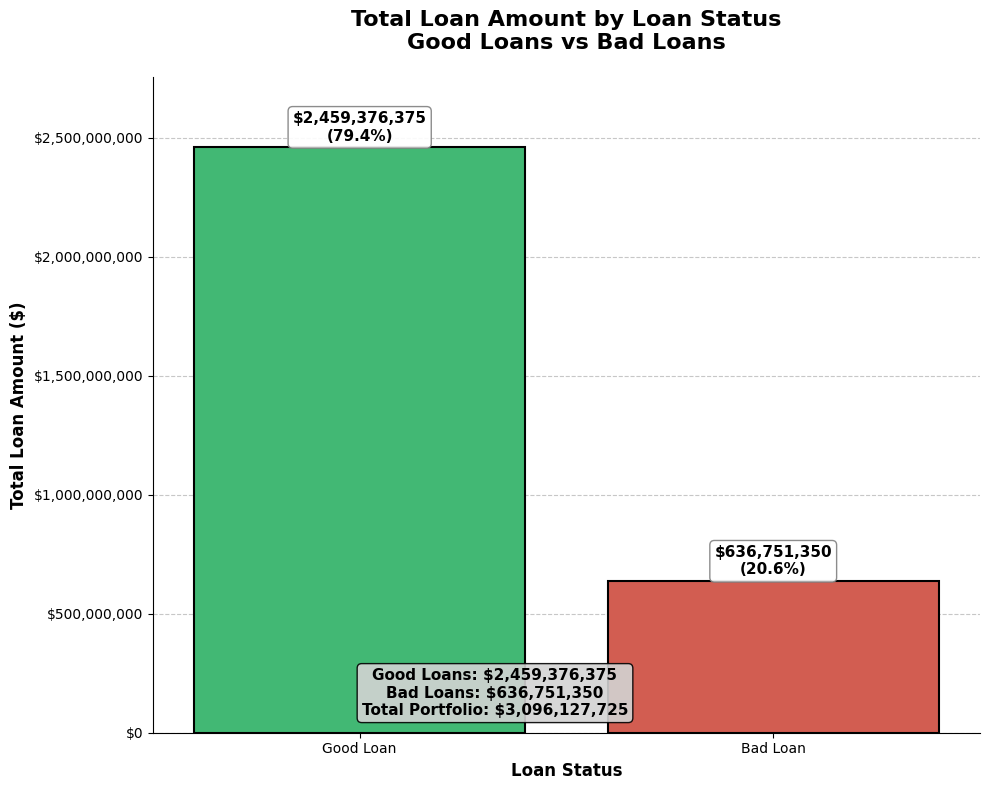

In [62]:
# Mapping untuk label yang lebih informatif
status_labels = {
    0: "Good Loan",
    1: "Bad Loan"
}

# Group data berdasarkan status_bad
loan_amount_by_status = df.groupby('status_bad')['loan_amnt'].sum().reset_index()

# Urutkan dari besar ke kecil
loan_amount_by_status = loan_amount_by_status.sort_values('loan_amnt', ascending=False)

# Buat label untuk sumbu x
loan_amount_by_status['status_label'] = loan_amount_by_status['status_bad'].map(status_labels)

# Warna yang sesuai konteks
colors = ['#2ECC71' if status == 0 else '#E74C3C' 
          for status in loan_amount_by_status['status_bad']]

# Buat plot dengan ukuran yang lebih tinggi
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=loan_amount_by_status, 
                 x='status_label', 
                 y='loan_amnt',
                 palette=colors,
                 edgecolor='black',
                 linewidth=1.5)

# Tambahkan nilai di atas bar
for i, (idx, row) in enumerate(loan_amount_by_status.iterrows()):
    # Tampilkan nilai dengan format dolar
    value_text = f'${row["loan_amnt"]:,.0f}'
    
    # Hitung persentase dari total
    total_loan = loan_amount_by_status['loan_amnt'].sum()
    percentage = (row['loan_amnt'] / total_loan) * 100
    
    # Tampilkan nilai dan persentase di atas bar
    ax.text(i, row['loan_amnt'] + (total_loan * 0.005),  # Posisi lebih rendah
            f'{value_text}\n({percentage:.1f}%)',
            ha='center', va='bottom',
            fontsize=11, fontweight='bold',
            color='black',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray', pad=0.3))

# Atur sumbu y
plt.ylabel('Total Loan Amount ($)', fontsize=12, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')

# Atur limit sumbu y untuk ruang yang cukup untuk teks
max_value = loan_amount_by_status['loan_amnt'].max()
plt.ylim(0, max_value * 1.12)  # Sedikit lebih rendah

# Judul
plt.title('Total Loan Amount by Loan Status\nGood Loans vs Bad Loans', 
          fontsize=16, fontweight='bold', pad=20)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grid untuk readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Format sumbu y dengan dolar
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Hitung statistik untuk summary
good_loan_amt = loan_amount_by_status.loc[loan_amount_by_status['status_bad'] == 0, 'loan_amnt']
bad_loan_amt = loan_amount_by_status.loc[loan_amount_by_status['status_bad'] == 1, 'loan_amnt']

# Tambahkan ringkasan statistik DI LUAR plot area (di bawah)
if len(good_loan_amt) > 0 and len(bad_loan_amt) > 0:
    good_val = good_loan_amt.values[0] if len(good_loan_amt) > 0 else 0
    bad_val = bad_loan_amt.values[0] if len(bad_loan_amt) > 0 else 0
    
    summary_text = f"Good Loans: ${good_val:,.0f}\nBad Loans: ${bad_val:,.0f}\nTotal Portfolio: ${total_loan:,.0f}"
    
    # Tambahkan summary box di luar plot area dengan adjust posisi
    plt.figtext(0.5, 0.1, summary_text, 
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.9, 
                         edgecolor='black', linewidth=1))

# Atur layout dengan memberikan lebih banyak ruang di bawah
plt.subplots_adjust(bottom=0.15)  # Tambahkan lebih banyak ruang di bawah

plt.tight_layout()
plt.show()

C:\Users\prima\AppData\Local\Temp\ipykernel_32732\3377372025.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_states_df,


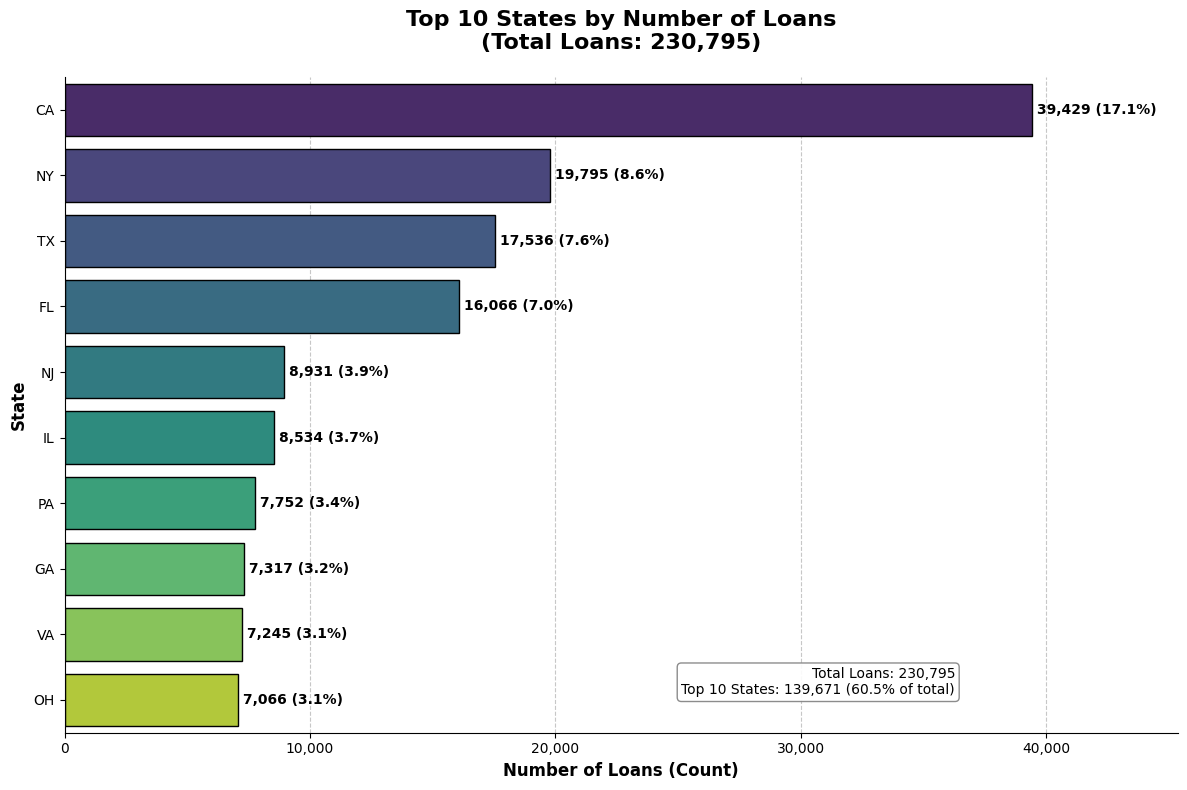


TOP 10 STATES BY NUMBER OF LOANS
Rank  State    Count        Percentage   Cumulative %
------------------------------------------------------------
1     CA       39,429       17.1        % 17.1        %
2     NY       19,795       8.6         % 25.7        %
3     TX       17,536       7.6         % 33.3        %
4     FL       16,066       7.0         % 40.2        %
5     NJ       8,931        3.9         % 44.1        %
6     IL       8,534        3.7         % 47.8        %
7     PA       7,752        3.4         % 51.1        %
8     GA       7,317        3.2         % 54.3        %
9     VA       7,245        3.1         % 57.5        %
10    OH       7,066        3.1         % 60.5        %
Total Loans (All States): 230,795
Coverage by Top 10: 60.5%


In [63]:
state_counts = df['addr_state'].value_counts()
top_10_states = state_counts.head(10)

# Hitung persentase terhadap total
total_count = len(df)
percentages = (top_10_states.values / total_count * 100)

# Buat DataFrame untuk plotting
top_states_df = top_10_states.reset_index()
top_states_df.columns = ['addr_state', 'count']
top_states_df['percentage'] = percentages

# Buat plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_states_df, 
                 x='count', 
                 y='addr_state',
                 palette='viridis',
                 edgecolor='black',
                 linewidth=1)

# Tambahkan nilai count dan persentase di setiap bar
for i, (count, pct) in enumerate(zip(top_states_df['count'], top_states_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,} ({pct:.1f}%)'
    
    # Posisi teks: sedikit di sebelah kanan bar
    ax.text(count + (max(top_states_df['count']) * 0.005), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=10,
            fontweight='bold')

# Atur label sumbu
plt.xlabel('Number of Loans (Count)', fontsize=12, fontweight='bold')
plt.ylabel('State', fontsize=12, fontweight='bold')

# Judul dengan informasi total
plt.title(f'Top 10 States by Number of Loans\n(Total Loans: {total_count:,})', 
          fontsize=16, fontweight='bold', pad=20)

# Format sumbu x dengan comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu x untuk memberikan ruang untuk label
plt.xlim(0, max(top_states_df['count']) * 1.15)

# Tambahkan informasi total di pojok kanan atas
total_text = f'Total Loans: {total_count:,}\n'
total_text += f'Top 10 States: {top_states_df["count"].sum():,} ({top_states_df["count"].sum()/total_count*100:.1f}% of total)'

ax.text(0.8, 0.1, total_text,
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()
plt.show()

# Tampilkan juga dalam format tabel untuk referensi
print("\n" + "="*60)
print("TOP 10 STATES BY NUMBER OF LOANS")
print("="*60)
print(f"{'Rank':<5} {'State':<8} {'Count':<12} {'Percentage':<12} {'Cumulative %':<12}")
print("-"*60)

cumulative_percentage = 0
for rank, (state, count, pct) in enumerate(zip(top_states_df['addr_state'], 
                                               top_states_df['count'], 
                                               top_states_df['percentage']), 1):
    cumulative_percentage += pct
    print(f"{rank:<5} {state:<8} {count:<12,} {pct:<12.1f}% {cumulative_percentage:<12.1f}%")

print("="*60)
print(f"Total Loans (All States): {total_count:,}")
print(f"Coverage by Top 10: {top_states_df['count'].sum()/total_count*100:.1f}%")

C:\Users\prima\AppData\Local\Temp\ipykernel_32732\3417630166.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_df,


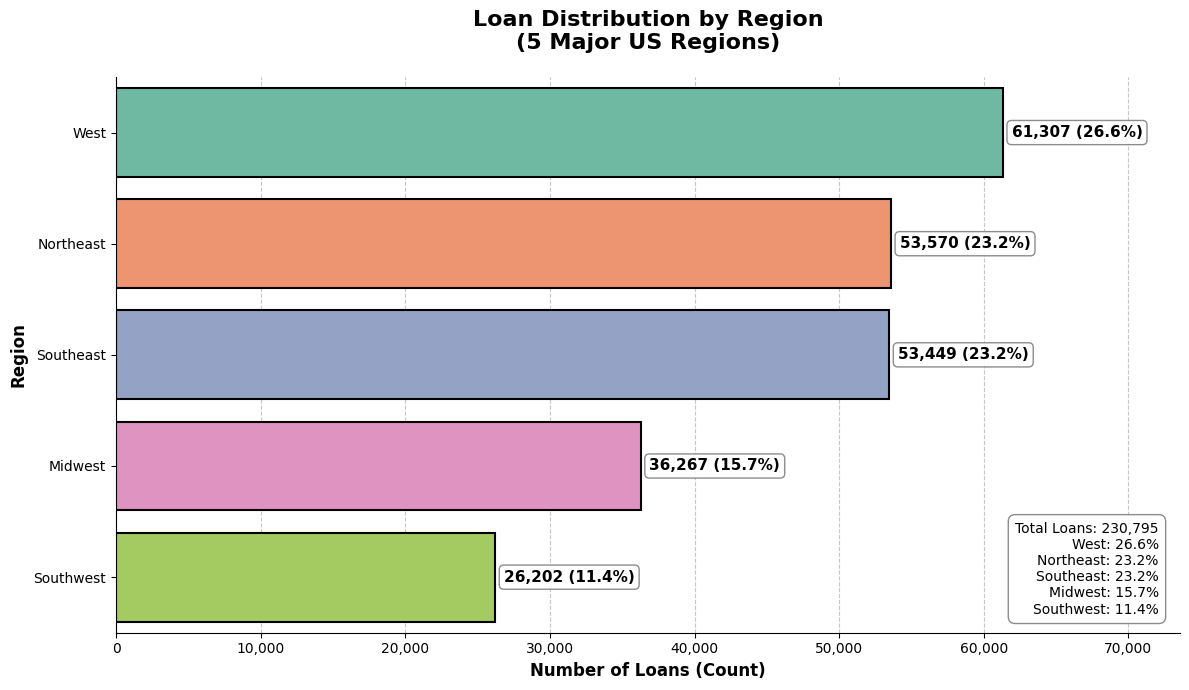


LOAN DISTRIBUTION BY REGION
Region          Count           Percentage      Cumulative %   
----------------------------------------------------------------------
West            61,307          26.6           % 26.6           %
Northeast       53,570          23.2           % 49.8           %
Southeast       53,449          23.2           % 72.9           %
Midwest         36,267          15.7           % 88.6           %
Southwest       26,202          11.4           % 100.0          %
Total Loans: 230,795
Average per Region: 46,159 loans

DEFAULT RATE BY REGION
Region          Total Loans     Default Rate   
----------------------------------------------------------------------
West            61,307          18.03          %
Northeast       53,570          19.55          %
Southeast       53,449          20.17          %
Midwest         36,267          19.62          %
Southwest       26,202          17.74          %


In [64]:
# Hitung count untuk setiap region
region_counts = df['region'].value_counts()
total_count = len(df)

# Hitung persentase
percentages = (region_counts.values / total_count * 100)

# Buat DataFrame untuk plotting
region_df = region_counts.reset_index()
region_df.columns = ['region', 'count']
region_df['percentage'] = percentages

# Urutkan berdasarkan count (terbesar ke terkecil)
region_df = region_df.sort_values('count', ascending=False)

# Buat plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=region_df, 
                 x='count', 
                 y='region',
                 palette='Set2',  # Palette yang baik untuk kategori sedikit
                 edgecolor='black',
                 linewidth=1.5,
                 saturation=0.8)

# Tambahkan nilai count dan persentase di setiap bar
for i, (count, pct) in enumerate(zip(region_df['count'], region_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,} ({pct:.1f}%)'
    
    # Posisi teks: sedikit di sebelah kanan bar
    ax.text(count + (max(region_df['count']) * 0.01), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=11,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                     edgecolor='gray', pad=0.3))

# Atur label sumbu
plt.xlabel('Number of Loans (Count)', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')

# Judul dengan informasi total
plt.title('Loan Distribution by Region\n(5 Major US Regions)', 
          fontsize=16, fontweight='bold', pad=20)

# Format sumbu x dengan comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu x untuk memberikan ruang untuk label
plt.xlim(0, max(region_df['count']) * 1.2)

# Tambahkan ringkasan statistik di pojok kanan atas
summary_text = f'Total Loans: {total_count:,}\n'
for region, count, pct in zip(region_df['region'], region_df['count'], region_df['percentage']):
    summary_text += f'{region}: {pct:.1f}%\n'

ax.text(0.98, 0.2, summary_text.strip(),
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                 edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

# Tampilkan dalam format tabel untuk referensi
print("\n" + "="*70)
print("LOAN DISTRIBUTION BY REGION")
print("="*70)
print(f"{'Region':<15} {'Count':<15} {'Percentage':<15} {'Cumulative %':<15}")
print("-"*70)

cumulative_percentage = 0
for idx, row in region_df.iterrows():
    cumulative_percentage += row['percentage']
    print(f"{row['region']:<15} {row['count']:<15,} {row['percentage']:<15.1f}% {cumulative_percentage:<15.1f}%")

print("="*70)
print(f"Total Loans: {total_count:,}")
print(f"Average per Region: {total_count/len(region_df):,.0f} loans")
print("="*70)

# Analisis tambahan: Default rate per region
if 'status_bad' in df.columns or 'loan_status' in df.columns:
    print("\n" + "="*70)
    print("DEFAULT RATE BY REGION")
    print("="*70)
    
    # Tentukan kolom status
    status_col = 'status_bad' if 'status_bad' in df.columns else 'loan_status'
    
    # Hitung default rate per region
    default_by_region = df.groupby('region')[status_col].agg(['count', 'mean'])
    default_by_region.columns = ['total_loans', 'default_rate']
    default_by_region['default_rate'] = default_by_region['default_rate'] * 100
    default_by_region = default_by_region.sort_values('total_loans', ascending=False)
    
    print(f"{'Region':<15} {'Total Loans':<15} {'Default Rate':<15}")
    print("-"*70)
    
    for region, row in default_by_region.iterrows():
        print(f"{region:<15} {row['total_loans']:<15,} {row['default_rate']:<15.2f}%")
    
    print("="*70)

C:\Users\prima\AppData\Local\Temp\ipykernel_32732\4062391075.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=purpose_df,
C:\Users\prima\AppData\Local\Temp\ipykernel_32732\4062391075.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_labels, fontsize=11)


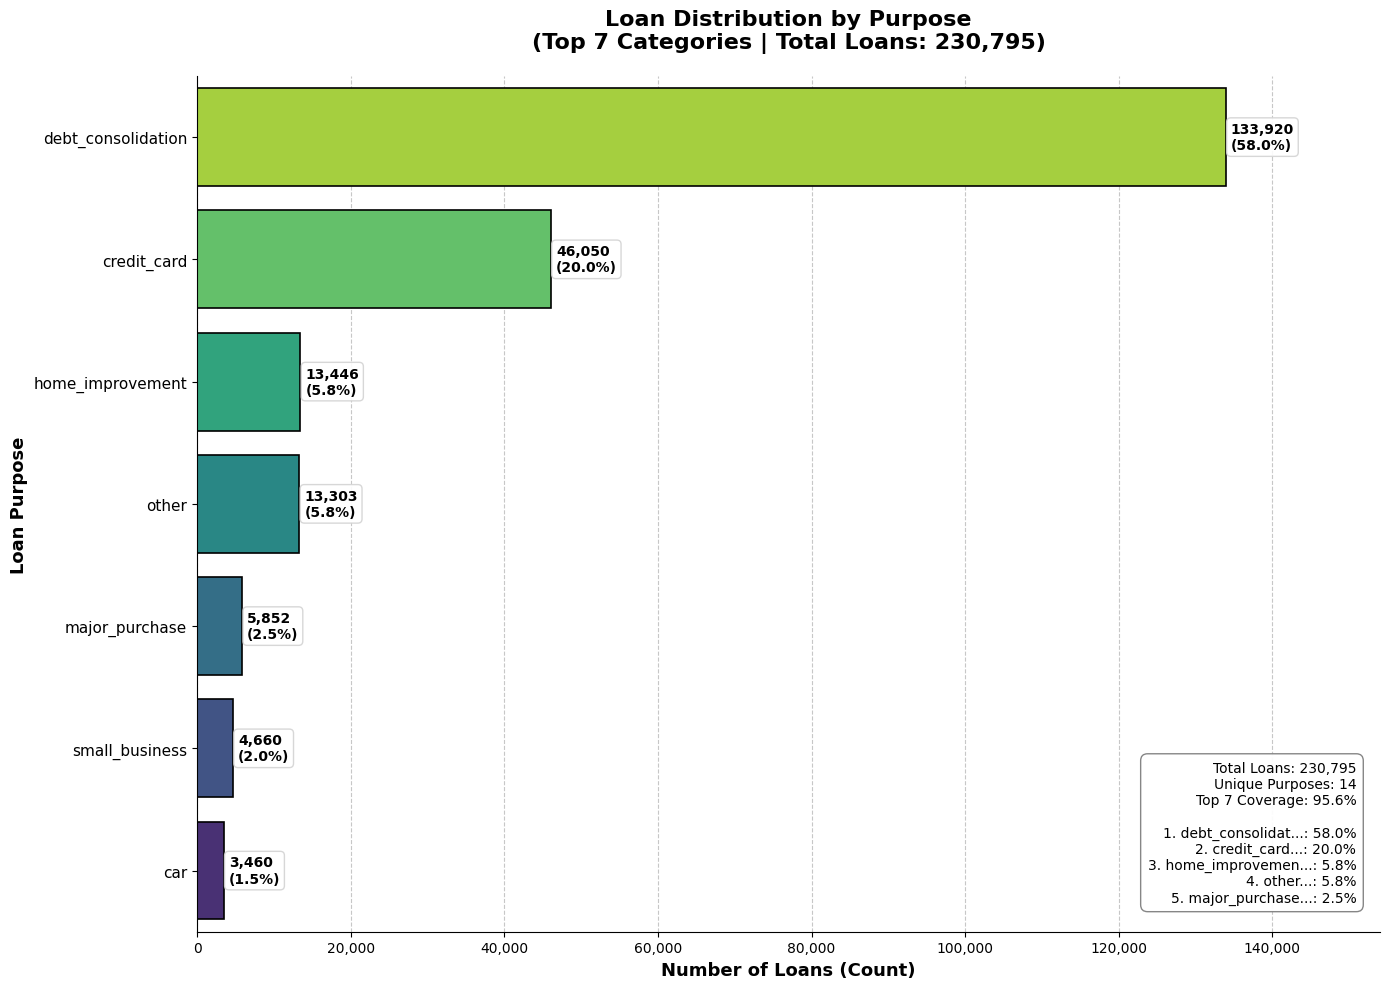


LOAN DISTRIBUTION BY PURPOSE
Rank  Purpose                   Count           Percentage   Cumulative %
--------------------------------------------------------------------------------
1     debt_consolidation        133,920         58.0        % 58.0        %
2     credit_card               46,050          20.0        % 78.0        %
3     home_improvement          13,446          5.8         % 83.8        %
4     other                     13,303          5.8         % 89.6        %
5     major_purchase            5,852           2.5         % 92.1        %
6     small_business            4,660           2.0         % 94.1        %
7     car                       3,460           1.5         % 95.6        %
Total Loans: 230,795
Top 7 Coverage: 95.6%
Average per Purpose: 16,485 loans

DEFAULT RATE BY PURPOSE (Top 10)
Purpose                   Total Loans     Default Rate   
--------------------------------------------------------------------------------
debt_consolidation        133,920

In [65]:
# Hitung count untuk setiap purpose dan ambil semua atau top N
purpose_counts = df['purpose'].value_counts()
total_count = len(df)

# Tampilkan semua purpose atau ambil top tertentu (misal top 12 jika banyak)
n_to_show = min(7, len(purpose_counts))  # Maksimal 15 kategori
top_purposes = purpose_counts.head(n_to_show)

# Hitung persentase
percentages = (top_purposes.values / total_count * 100)

# Buat DataFrame untuk plotting
purpose_df = top_purposes.reset_index()
purpose_df.columns = ['purpose', 'count']
purpose_df['percentage'] = percentages

# Urutkan berdasarkan count (terbesar ke terkecil)
purpose_df = purpose_df.sort_values('count', ascending=False)

# Buat plot dengan ukuran lebih besar untuk readability
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=purpose_df, 
                 x='count', 
                 y='purpose',
                 palette='viridis_r',  # Reverse viridis untuk highlight tertinggi
                 edgecolor='black',
                 linewidth=1.2,
                 saturation=0.85)

# Format label purpose (wrap jika panjang)
def format_purpose_label(purpose, max_length=25):
    """Wrap text jika terlalu panjang"""
    if len(purpose) > max_length:
        return '\n'.join(textwrap.wrap(purpose, max_length))
    return purpose

# Apply formatting
formatted_labels = [format_purpose_label(p) for p in purpose_df['purpose']]
ax.set_yticklabels(formatted_labels, fontsize=11)

# Tambahkan nilai count dan persentase di setiap bar
for i, (count, pct) in enumerate(zip(purpose_df['count'], purpose_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,}\n({pct:.1f}%)'
    
    # Posisi teks: sedikit di sebelah kanan bar
    ax.text(count + (max(purpose_df['count']) * 0.005), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                     edgecolor='lightgray', pad=0.3))

# Atur label sumbu
plt.xlabel('Number of Loans (Count)', fontsize=13, fontweight='bold')
plt.ylabel('Loan Purpose', fontsize=13, fontweight='bold')

# Judul dengan informasi total
title_text = f'Loan Distribution by Purpose\n(Top {n_to_show} Categories | Total Loans: {total_count:,})'
plt.title(title_text, fontsize=16, fontweight='bold', pad=20)

# Format sumbu x dengan comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu x untuk memberikan ruang untuk label
plt.xlim(0, max(purpose_df['count']) * 1.15)

# Tambahkan ringkasan statistik di pojok kanan atas
summary_text = f'Total Loans: {total_count:,}\n'
summary_text += f'Unique Purposes: {len(purpose_counts)}\n'
summary_text += f'Top {n_to_show} Coverage: {top_purposes.sum()/total_count*100:.1f}%\n\n'

for i, (purpose, count, pct) in enumerate(zip(purpose_df['purpose'], 
                                              purpose_df['count'], 
                                              purpose_df['percentage'])):
    if i < 5:  # Tampilkan top 5 dalam summary
        summary_text += f'{i+1}. {purpose[:15]}...: {pct:.1f}%\n'

ax.text(0.98, 0.2, summary_text.strip(),
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.95, 
                 edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

# Tampilkan dalam format tabel untuk referensi
print("\n" + "="*80)
print("LOAN DISTRIBUTION BY PURPOSE")
print("="*80)
print(f"{'Rank':<5} {'Purpose':<25} {'Count':<15} {'Percentage':<12} {'Cumulative %':<12}")
print("-"*80)

cumulative_percentage = 0
for rank, (purpose, count, pct) in enumerate(zip(purpose_df['purpose'], 
                                                 purpose_df['count'], 
                                                 purpose_df['percentage']), 1):
    cumulative_percentage += pct
    # Shorten purpose if too long for table
    display_purpose = purpose[:24] + "..." if len(purpose) > 27 else purpose
    print(f"{rank:<5} {display_purpose:<25} {count:<15,} {pct:<12.1f}% {cumulative_percentage:<12.1f}%")

print("="*80)
print(f"Total Loans: {total_count:,}")
print(f"Top {n_to_show} Coverage: {top_purposes.sum()/total_count*100:.1f}%")
print(f"Average per Purpose: {total_count/len(purpose_counts):,.0f} loans")
print("="*80)

# Analisis tambahan: Default rate per purpose
if 'status_bad' in df.columns or 'loan_status' in df.columns:
    print("\n" + "="*80)
    print("DEFAULT RATE BY PURPOSE (Top 10)")
    print("="*80)
    
    # Tentukan kolom status
    status_col = 'status_bad' if 'status_bad' in df.columns else 'loan_status'
    
    # Hitung default rate per purpose
    default_by_purpose = df.groupby('purpose')[status_col].agg(['count', 'mean'])
    default_by_purpose.columns = ['total_loans', 'default_rate']
    default_by_purpose['default_rate'] = default_by_purpose['default_rate'] * 100
    default_by_purpose = default_by_purpose.sort_values('total_loans', ascending=False)
    
    # Ambil top 10
    default_top10 = default_by_purpose.head(10)
    
    print(f"{'Purpose':<25} {'Total Loans':<15} {'Default Rate':<15}")
    print("-"*80)
    
    for purpose, row in default_top10.iterrows():
        display_purpose = purpose[:24] + "..." if len(purpose) > 27 else purpose
        print(f"{display_purpose:<25} {row['total_loans']:<15,} {row['default_rate']:<15.2f}%")
    
    print("="*80)
    
    # Tambahan: Purpose dengan default rate tertinggi (risiko tinggi)
    print("\n" + "="*80)
    print("HIGHEST DEFAULT RATE PURPOSES (Min. 100 loans)")
    print("="*80)
    
    # Filter purposes dengan minimal 100 loans untuk stabilitas statistik
    high_risk = default_by_purpose[default_by_purpose['total_loans'] >= 100]
    high_risk = high_risk.sort_values('default_rate', ascending=False).head(10)
    
    print(f"{'Purpose':<25} {'Total Loans':<15} {'Default Rate':<15}")
    print("-"*80)
    
    for purpose, row in high_risk.iterrows():
        display_purpose = purpose[:24] + "..." if len(purpose) > 27 else purpose
        print(f"{display_purpose:<25} {row['total_loans']:<15,} {row['default_rate']:<15.2f}%")
    
    print("="*80)

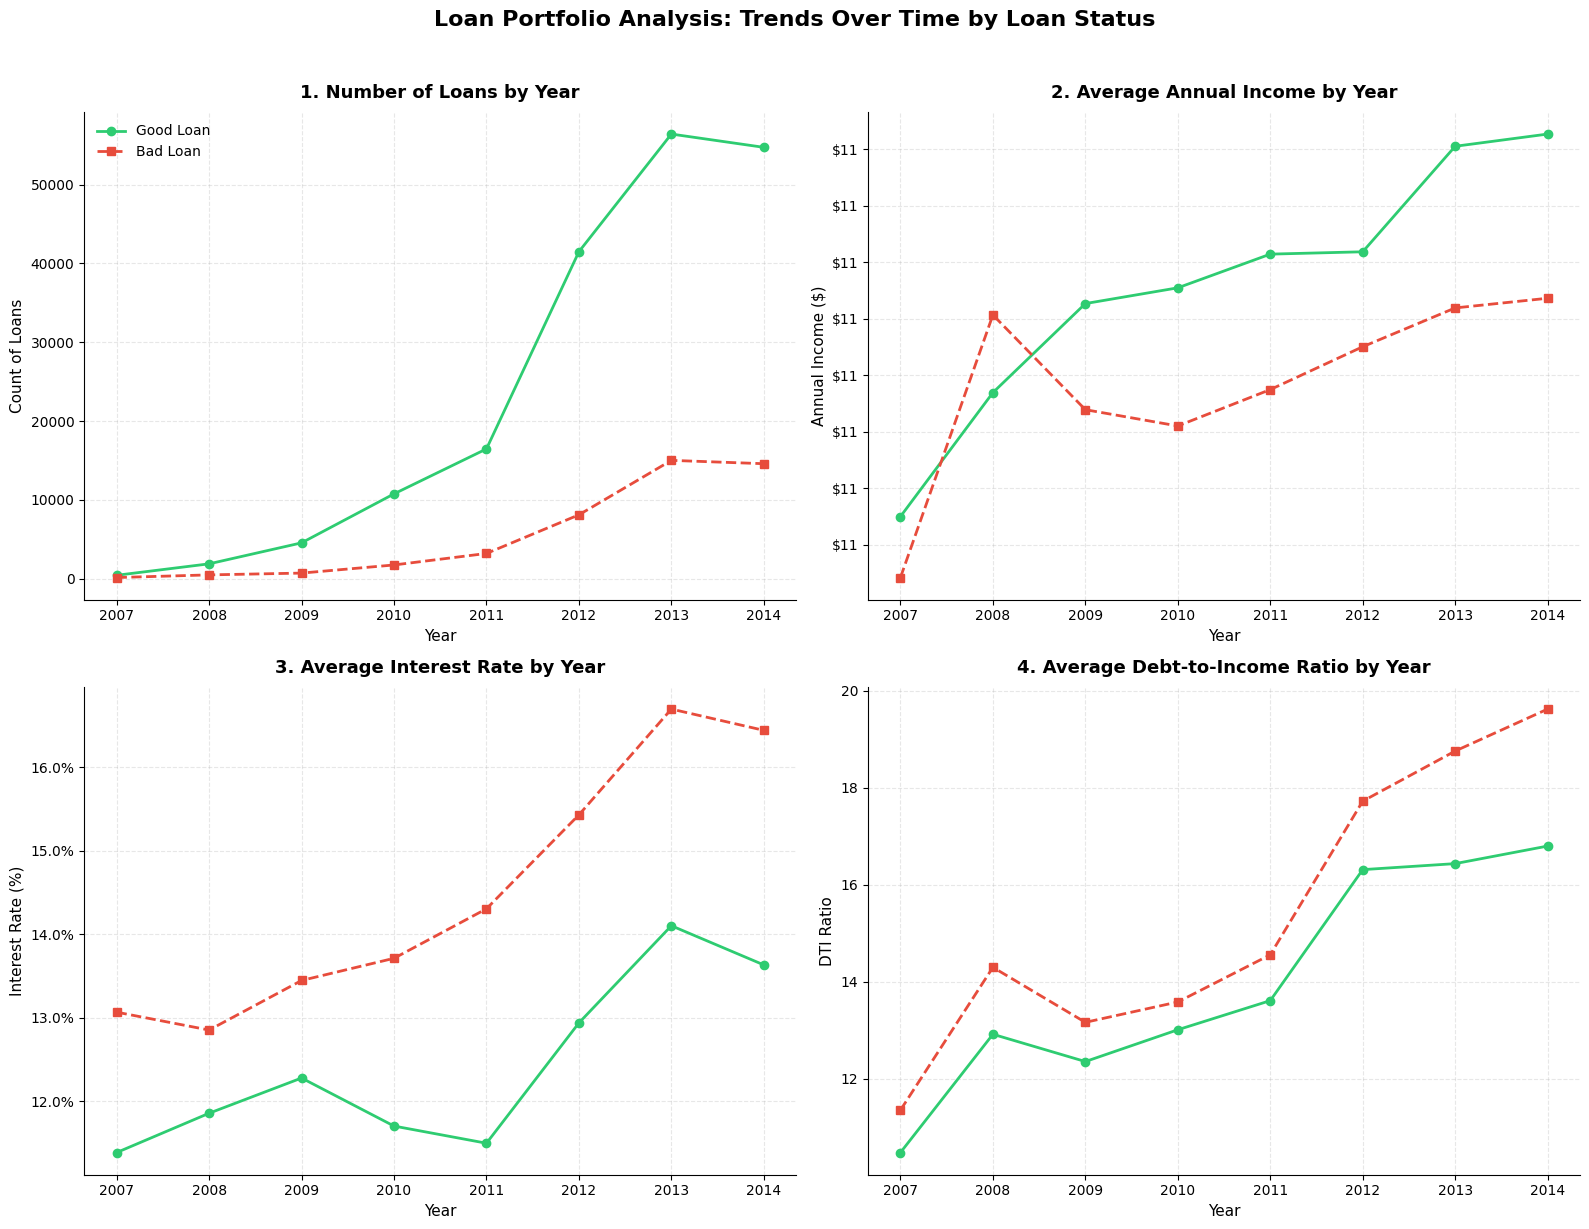

In [70]:
# Fungsi helper untuk styling konsisten
def apply_plot_style(ax, title, ylabel, show_legend=True):
    """Apply consistent styling to plots"""
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.tick_params(axis='both', labelsize=10)
    
    # Grid yang subtle
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if show_legend:
        ax.legend(fontsize=10, frameon=False)
    else:
        ax.legend().remove()

# Pastikan kolom yang diperlukan ada
required_cols = ['years', 'status_bad', 'annual_inc', 'int_rate', 'dti']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"Kolom yang tidak ditemukan: {missing_cols}")

# Buat figure dengan 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Warna dan style konsisten
colors = {'good_loan': '#2ECC71', 'bad_loan': '#E74C3C'}
line_styles = {'good_loan': '-', 'bad_loan': '--'}
markers = {'good_loan': 'o', 'bad_loan': 's'}

# ============================
# CHART 1: NUMBER OF LOANS (Count)
# ============================
ax1 = axes[0]
loan_count_data = df.groupby(['years', 'status_bad']).size().unstack(fill_value=0)

# Rename columns
if 0 in loan_count_data.columns:
    loan_count_data = loan_count_data.rename(columns={0: 'good_loan'})
if 1 in loan_count_data.columns:
    loan_count_data = loan_count_data.rename(columns={1: 'bad_loan'})

# Plot
for status in ['good_loan', 'bad_loan']:
    if status in loan_count_data.columns:
        ax1.plot(loan_count_data.index, 
                loan_count_data[status],
                label=status.replace('_', ' ').title(),
                color=colors[status],
                linestyle=line_styles[status],
                marker=markers[status],
                markersize=6,
                linewidth=2)

apply_plot_style(ax1, '1. Number of Loans by Year', 'Count of Loans')

# ============================
# CHART 2: AVERAGE ANNUAL INCOME
# ============================
ax2 = axes[1]
if 'annual_inc' in df.columns:
    # Hitung rata-rata annual income per tahun per status
    annual_inc_data = df.groupby(['years', 'status_bad'])['annual_inc'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in annual_inc_data.columns:
        annual_inc_data = annual_inc_data.rename(columns={0: 'good_loan'})
    if 1 in annual_inc_data.columns:
        annual_inc_data = annual_inc_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in annual_inc_data.columns:
            ax2.plot(annual_inc_data.index, 
                    annual_inc_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax2, '2. Average Annual Income by Year', 'Annual Income ($)', show_legend=False)
    
    # Format sebagai dolar
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
else:
    ax2.text(0.5, 0.5, 'annual_inc column\nnot available', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('2. Average Annual Income by Year', fontsize=13, fontweight='bold', pad=10)

# ============================
# CHART 3: AVERAGE INTEREST RATE
# ============================
ax3 = axes[2]
if 'int_rate' in df.columns:
    # Hitung rata-rata interest rate per tahun per status
    int_rate_data = df.groupby(['years', 'status_bad'])['int_rate'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in int_rate_data.columns:
        int_rate_data = int_rate_data.rename(columns={0: 'good_loan'})
    if 1 in int_rate_data.columns:
        int_rate_data = int_rate_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in int_rate_data.columns:
            ax3.plot(int_rate_data.index, 
                    int_rate_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax3, '3. Average Interest Rate by Year', 'Interest Rate (%)', show_legend=False)
    
    # Format sebagai persentase
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
else:
    ax3.text(0.5, 0.5, 'int_rate column\nnot available', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('3. Average Interest Rate by Year', fontsize=13, fontweight='bold', pad=10)

# ============================
# CHART 4: AVERAGE DEBT-TO-INCOME RATIO
# ============================
ax4 = axes[3]
if 'dti' in df.columns:
    # Hitung rata-rata DTI per tahun per status
    dti_data = df.groupby(['years', 'status_bad'])['dti'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in dti_data.columns:
        dti_data = dti_data.rename(columns={0: 'good_loan'})
    if 1 in dti_data.columns:
        dti_data = dti_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in dti_data.columns:
            ax4.plot(dti_data.index, 
                    dti_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax4, '4. Average Debt-to-Income Ratio by Year', 'DTI Ratio', show_legend=False)
else:
    ax4.text(0.5, 0.5, 'dti column\nnot available', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('4. Average Debt-to-Income Ratio by Year', fontsize=13, fontweight='bold', pad=10)

# Tambahkan title utama untuk seluruh figure
plt.suptitle('Loan Portfolio Analysis: Trends Over Time by Loan Status', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

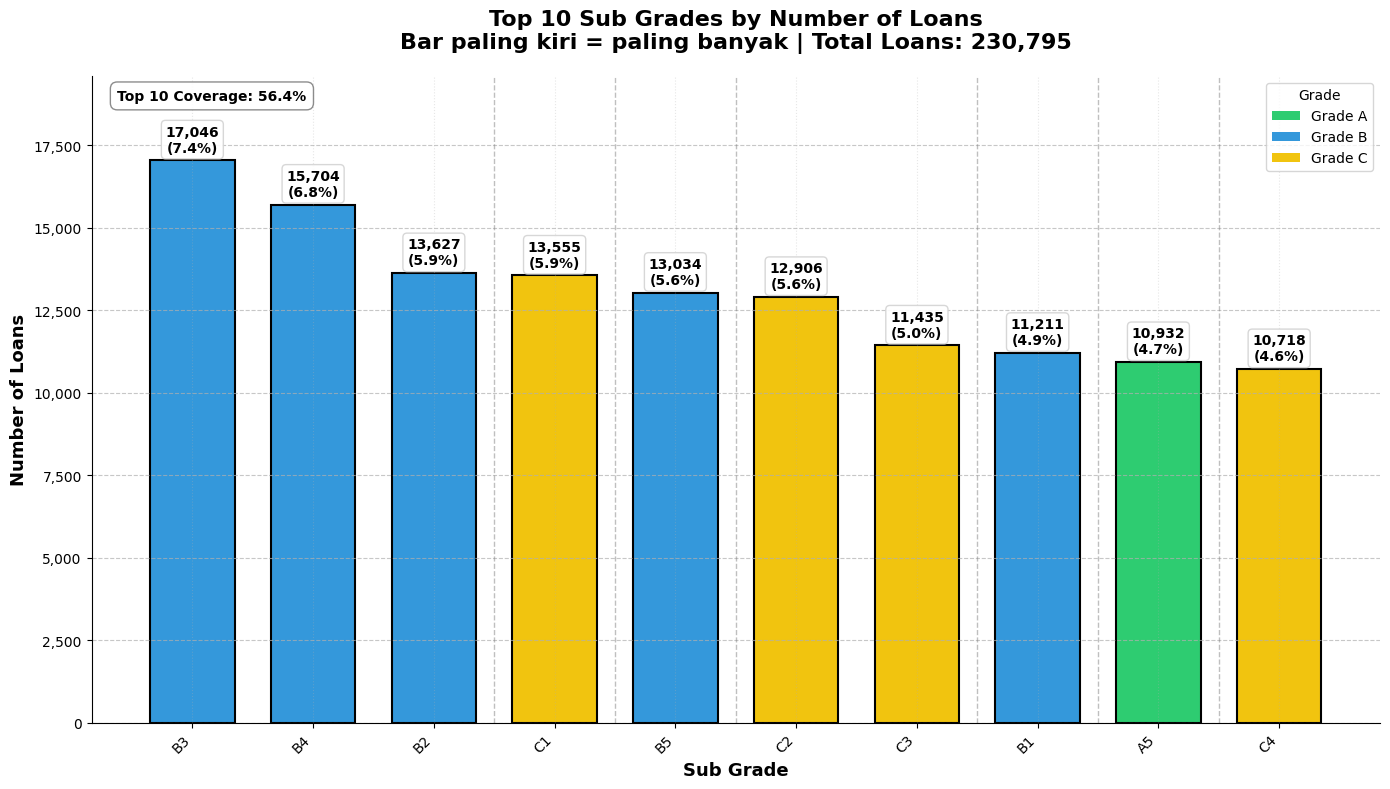

In [77]:
# Hitung count untuk setiap sub_grade dan ambil 10 terbesar
sub_grade_counts = df['sub_grade'].value_counts()
top_10_subgrades = sub_grade_counts.head(10)  # Ambil 10 teratas

total_count = len(df)

# Hitung persentase terhadap total
percentages = (top_10_subgrades.values / total_count * 100)

# Buat DataFrame untuk plotting - URUTKAN DARI BESAR KE KECIL untuk vertical bar
top_subgrades_df = top_10_subgrades.reset_index()
top_subgrades_df.columns = ['sub_grade', 'count']
top_subgrades_df['percentage'] = percentages
top_subgrades_df['grade'] = top_subgrades_df['sub_grade'].str[0]

# Urutkan dari besar ke kecil untuk vertical bar (paling kiri = paling besar)
top_subgrades_df = top_subgrades_df.sort_values('count', ascending=False).reset_index(drop=True)

# Warna berdasarkan grade
grade_colors = {
    'A': '#2ECC71',  # Hijau
    'B': '#3498DB',  # Biru
    'C': '#F1C40F',  # Kuning
    'D': '#E67E22',  # Oranye
    'E': '#E74C3C',  # Merah muda
    'F': '#C0392B',  # Merah
    'G': '#7D3C98'   # Ungu
}

# Buat plot VERTICAL BAR
plt.figure(figsize=(14, 8))

# Buat vertical bar chart dengan bar paling kiri paling panjang
bars = plt.bar(range(len(top_subgrades_df)), 
               top_subgrades_df['count'],
               color=[grade_colors.get(g, '#95A5A6') for g in top_subgrades_df['grade']],
               edgecolor='black',
               linewidth=1.5,
               width=0.7)

# Tambahkan nilai count di atas setiap bar
for i, (count, pct) in enumerate(zip(top_subgrades_df['count'], top_subgrades_df['percentage'])):
    # Format teks
    label_text = f'{count:,}\n({pct:.1f}%)'
    
    # Posisi teks: di atas bar
    plt.text(i, 
             count + (max(top_subgrades_df['count']) * 0.01), 
             label_text,
             ha='center', 
             va='bottom',
             fontsize=10,
             fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                      edgecolor='lightgray', pad=0.3))

# Atur label sumbu
plt.xlabel('Sub Grade', fontsize=13, fontweight='bold')
plt.ylabel('Number of Loans', fontsize=13, fontweight='bold')

# Atur x-ticks
plt.xticks(range(len(top_subgrades_df)), top_subgrades_df['sub_grade'], rotation=45, ha='right')

# Judul dengan informasi total
plt.title(f'Top 10 Sub Grades by Number of Loans\nBar paling kiri = paling banyak | Total Loans: {total_count:,}', 
          fontsize=16, fontweight='bold', pad=20)

# Format sumbu y dengan comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle=':', alpha=0.3)

# Hapus spines yang tidak perlu
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu y untuk memberikan ruang untuk label
plt.ylim(0, max(top_subgrades_df['count']) * 1.15)

# Tambahkan garis pembatas grade jika grade berubah
current_grade = None
for i, sub_grade in enumerate(top_subgrades_df['sub_grade']):
    grade = sub_grade[0]
    if grade != current_grade and current_grade is not None:
        plt.axvline(x=i-0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    current_grade = grade

# Buat legend untuk grade colors
from matplotlib.patches import Patch
unique_grades = sorted(top_subgrades_df['grade'].unique())
legend_elements = [Patch(facecolor=grade_colors[g], label=f'Grade {g}') for g in unique_grades]
plt.legend(handles=legend_elements, title='Grade', loc='upper right', fontsize=10)

# Tambahkan informasi coverage di dalam plot
coverage = top_subgrades_df['count'].sum() / total_count * 100
summary_text = f'Top 10 Coverage: {coverage:.1f}%'
plt.text(0.02, 0.98, summary_text,
         transform=ax.transAxes,
         ha='left',
         va='top',
         fontsize=10,
         fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                  edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   pymnt_plan                           230795 non-null  object        
 9   purpose                              230795 non-null  object        
 10  a

In [ ]:
# Jangan dihapus
# df.drop(columns = ["issue_d", inplace = True)

In [ ]:
num_cols = df.select_dtypes(
    include=["int64", "float64", "Int64", "Float64"]
).columns
num_cols_eda = [
    col for col in num_cols
    if not (col.endswith("_missing") or col.endswith("_outlier"))
]
num_cols_eda = [
    col for col in num_cols_eda
    if col != "status_bad"
]
print(len(num_cols_eda))
num_cols_eda

21


['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'credit_history_months',
 'emp_length_num']

In [ ]:
# Histogram + Boxplot
hist_box_cols = [
    'loan_amnt',
    'int_rate',
    'annual_inc',
    'dti',
    'revol_bal',
    'revol_util',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'tot_coll_amt',
    'credit_history_months'
]

# Histogram only
hist_only_cols = [
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'total_acc',
    'pub_rec',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'emp_length_num'
]

# Boxplot only
box_only_cols = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog'
]


In [ ]:
def histplot_visual(data,column,n_row,n_col):
    fig, ax = plt.subplots(n_row,n_col,figsize=(15,15))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)

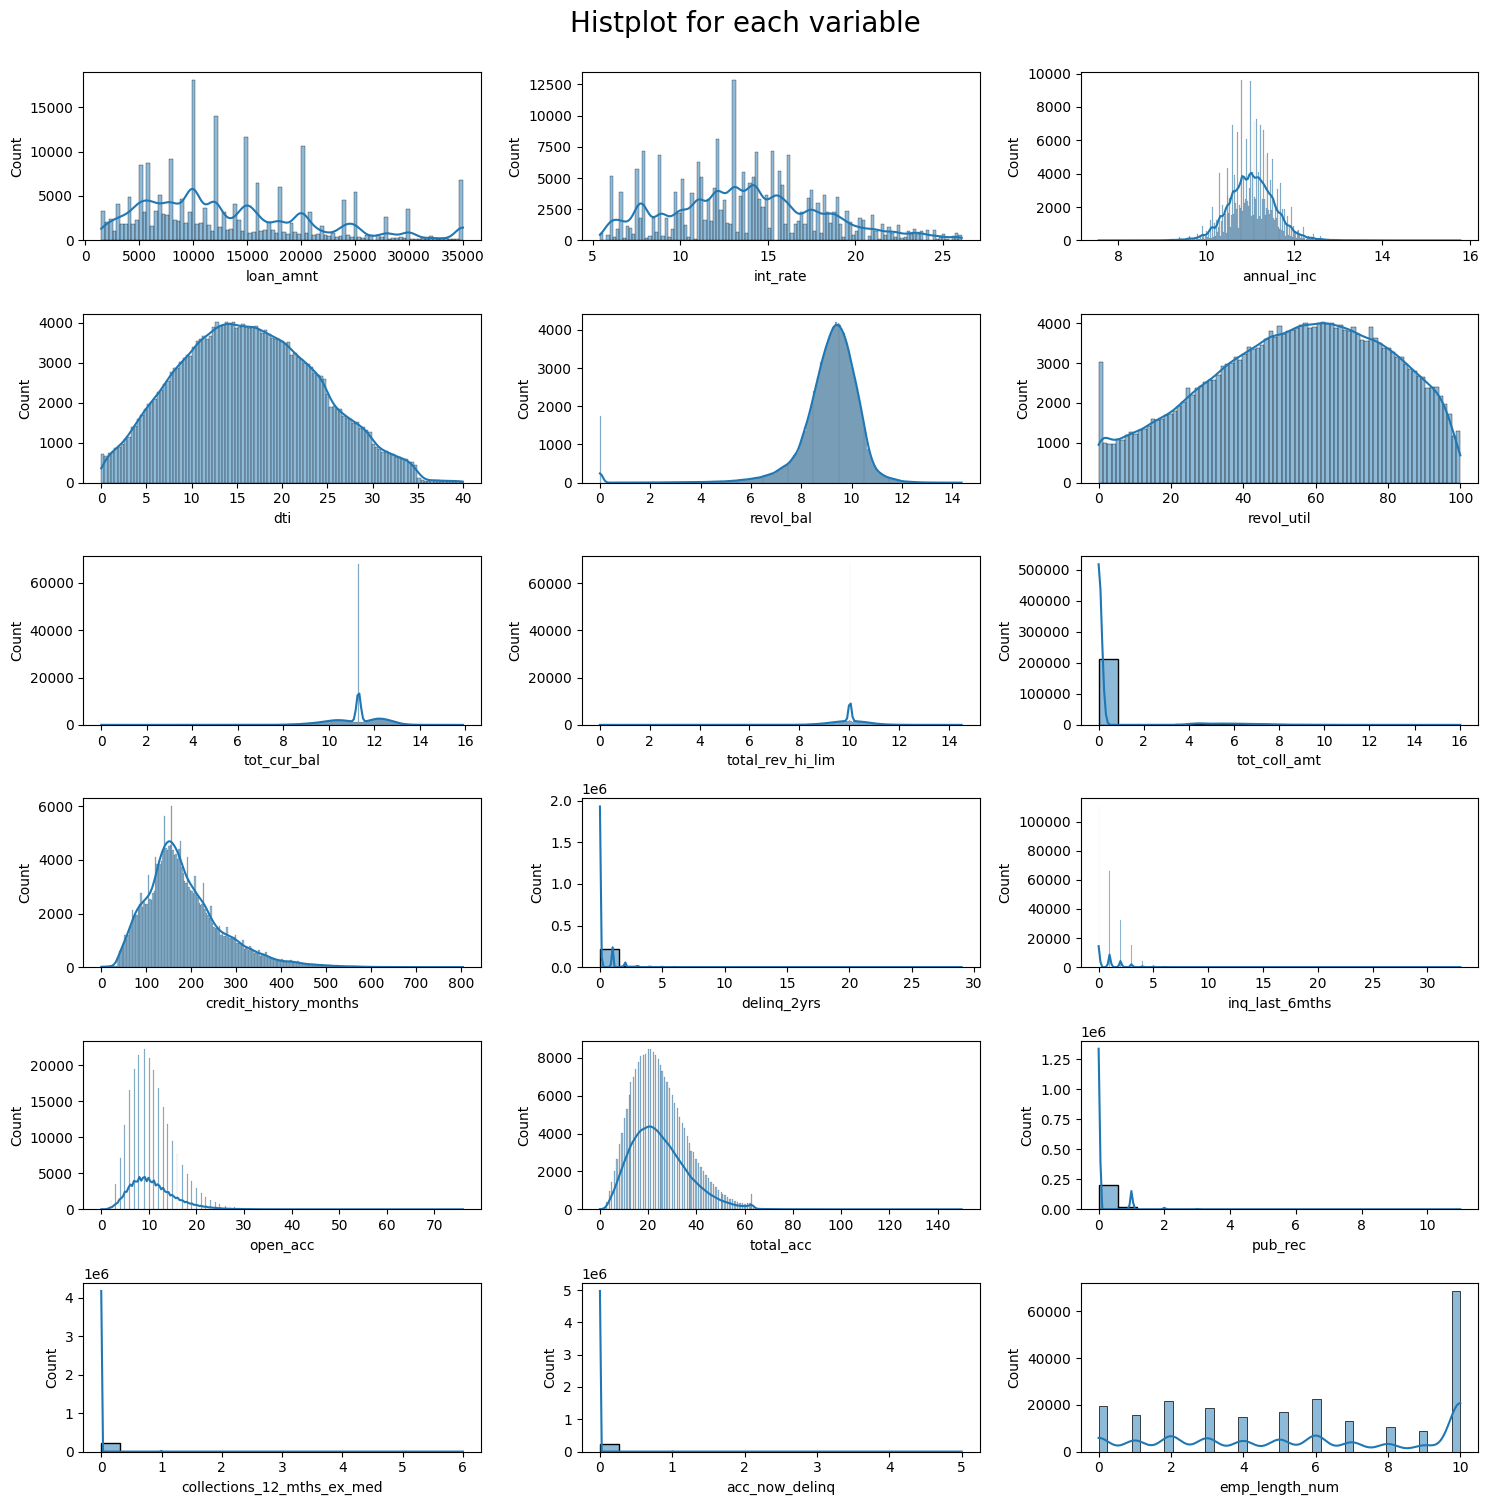

In [ ]:
histplot_visual(data=df,column=hist_box_cols+hist_only_cols, n_row = 6, n_col = 3)
plt.tight_layout()

In [ ]:
def boxplots_visual(data, columns, n_row, n_col, by=None):
    fig, ax = plt.subplots(n_row, n_col, figsize=(15, 15))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax = ax.flatten()

    for i, feature in enumerate(columns):
        if by is None:
            # Boxplot biasa (tanpa kategori)
            sns.boxplot(
                x=data[feature],
                ax=ax[i],
                orient='h'
            )
        else:
            # Boxplot berdasarkan kategori
            sns.boxplot(
                x=feature,
                y=by,
                data=data,
                ax=ax[i],
                orient='h'
            )

        skewness = round(data[feature].skew(skipna=True), 2)
        ax[i].set_title(f'{feature}, skewness: {skewness}', fontsize=10)

    # Hapus axis kosong jika jumlah kolom < grid
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()


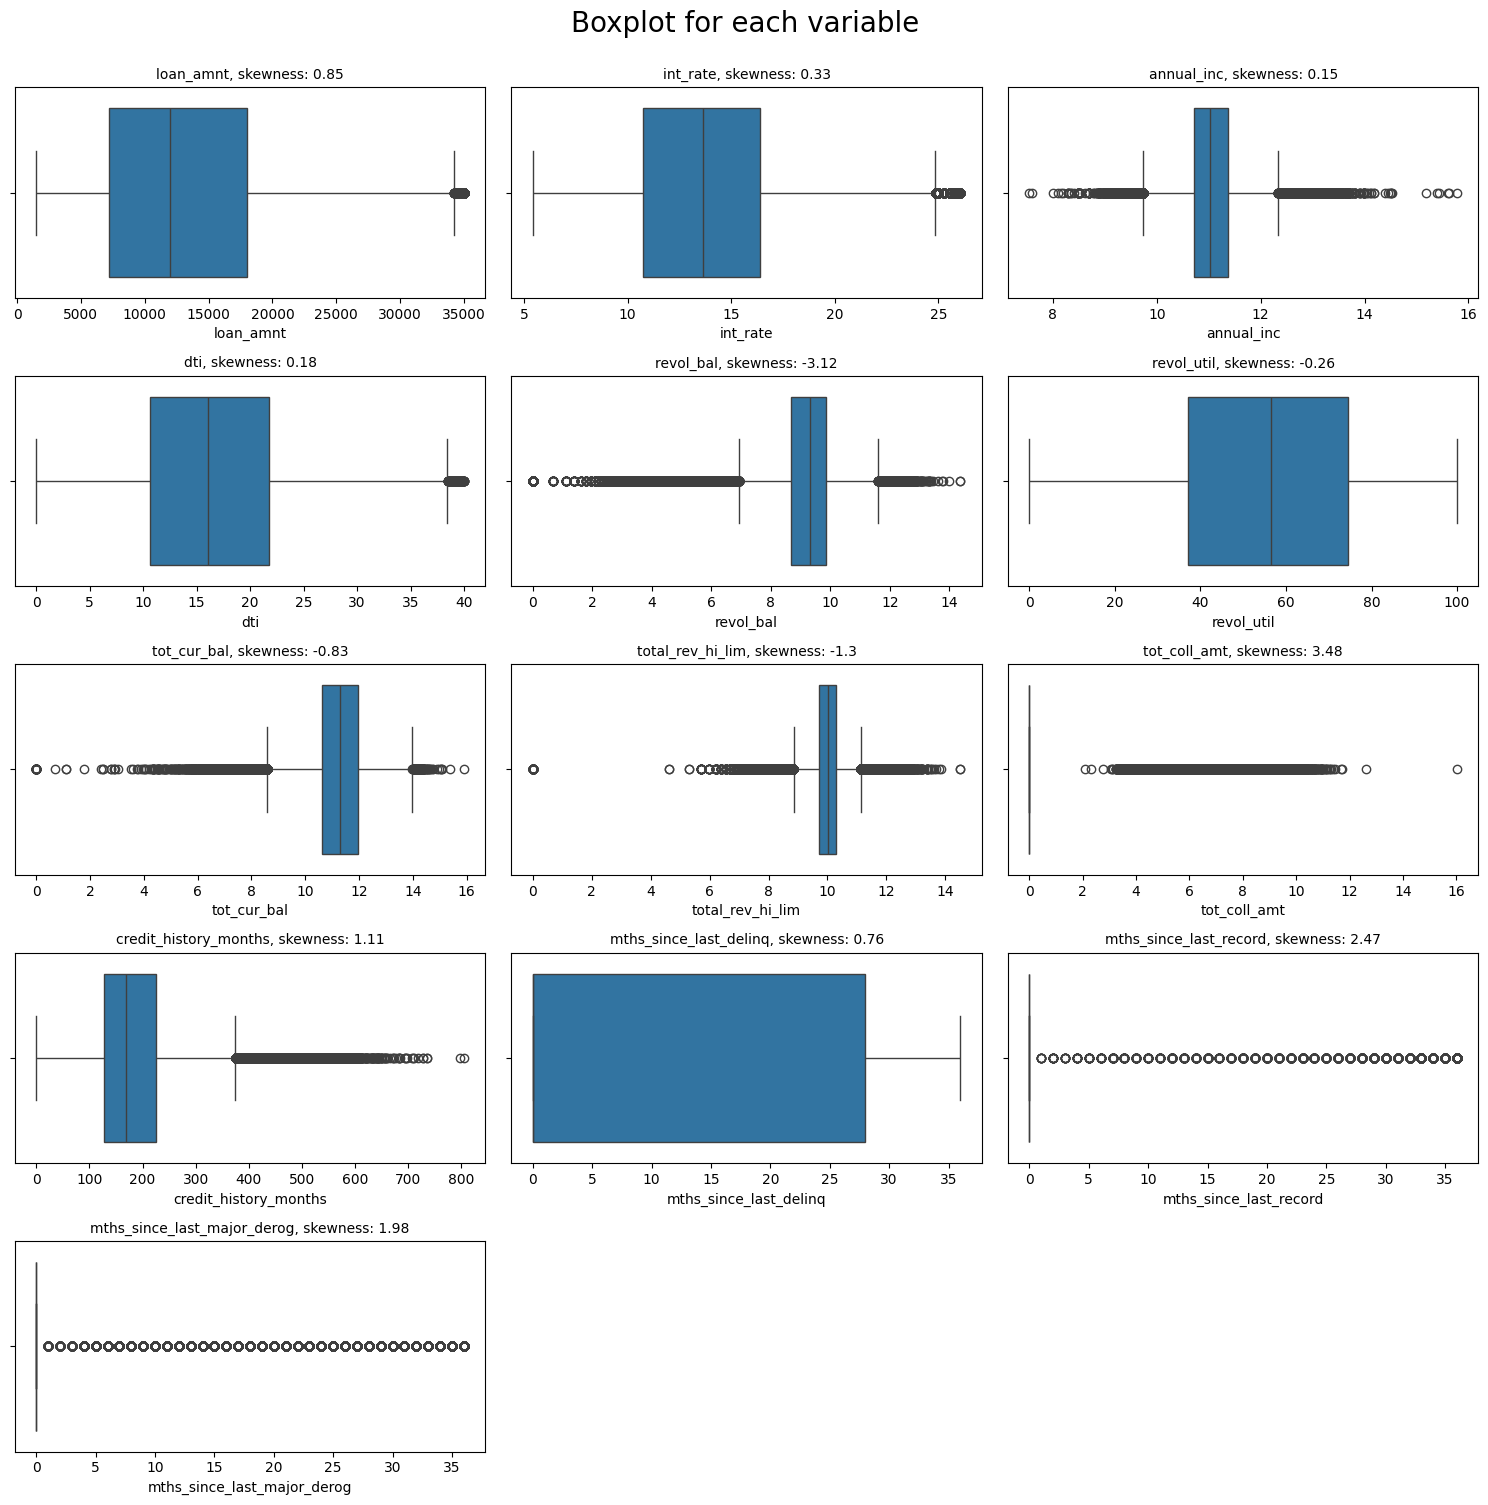

<Figure size 640x480 with 0 Axes>

In [ ]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3)
plt.tight_layout()

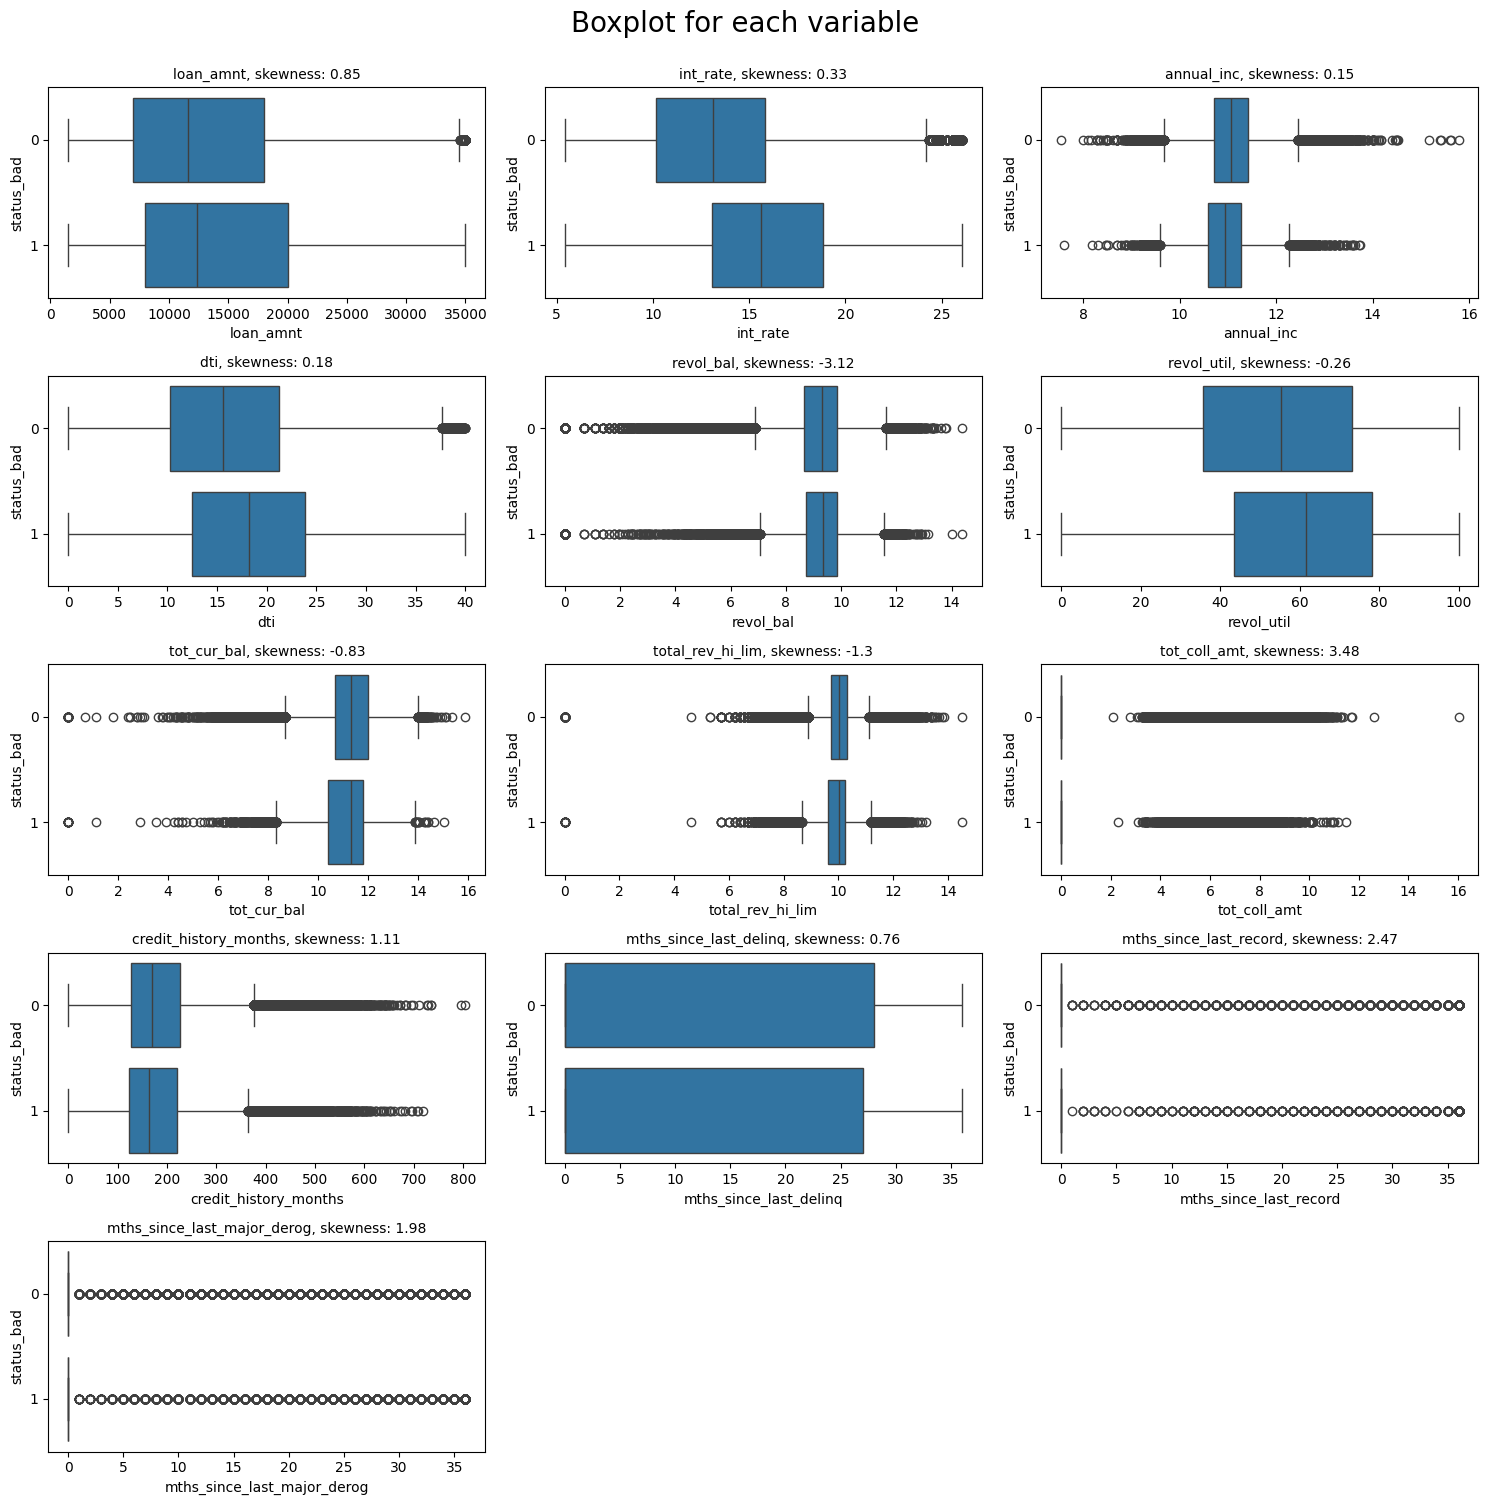

<Figure size 640x480 with 0 Axes>

In [ ]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3, by = "status_bad")
plt.tight_layout()

In [ ]:
print(df.select_dtypes(include='object').nunique())

term                    2
sub_grade              35
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
region                  5
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   pymnt_plan                           230795 non-null  object        
 9   purpose                              230795 non-null  object        
 10  a